Populating the interactive namespace from numpy and matplotlib


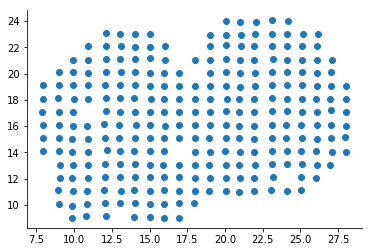

In [1]:
%pylab inline
import pandas as pd

rcParams['axes.spines.right'] = False
rcParams['axes.spines.top'] = False

results = pd.read_csv('../MouseOB/MOB_final_results.csv', index_col=0)
ms_results = pd.read_csv('../MouseOB/MOB_MS_results.csv', index_col=0)
sample_info = pd.read_csv('../MouseOB/MOB_sample_info.csv', index_col=0)

df = pd.read_csv('../MouseOB/data/Rep11_MOB_0.csv', index_col=0)
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes
sample_info = sample_info.query('total_counts > 10')  # Remove empty features
df = df.loc[sample_info.index]
dfm = np.log10(df + 1)

plt.scatter(sample_info.x, sample_info.y);

In [2]:
X = sample_info[['x', 'y']]

In [3]:
import SpatialDE
from scipy import stats

In [4]:
sim_expr = stats.norm.rvs(loc=0., scale=1., size=(X.shape[0], 3000))

In [5]:
sim_expr.shape

(260, 3000)

In [6]:
sim_expr = pd.DataFrame.from_records(sim_expr)

In [7]:
results = SpatialDE.run(X, sim_expr)
results.loc[results.pval < 1e-16, 'pval'] = 1e-16

INFO:root:Performing DE test
INFO:root:Pre-calculating USU^T = K's ...
INFO:root:Done: 0.085s
INFO:root:Fitting gene models
INFO:root:Model 1 of 10
 57%|█████▋    | 1717/3000 [00:01<00:01, 1140.92it/s]/Users/vale/Documents/Research/SpatialDE/Python-module/SpatialDE/base.py:175: RuntimeWarning: divide by zero encountered in double_scalars
  s2_logdelta = 1. / (derivative(LL_obj, np.log(max_delta), n=2) ** 2)
INFO:root:Model 2 of 10                              
INFO:root:Model 3 of 10                             
INFO:root:Model 4 of 10                             
INFO:root:Model 5 of 10                             
INFO:root:Model 6 of 10                             
INFO:root:Model 7 of 10                             
INFO:root:Model 8 of 10                             
INFO:root:Model 9 of 10                             
INFO:root:Model 10 of 10                            


In [8]:
tt = np.logspace(-2, 0, 10)
pp = []
for i in tt:
    pp.append(results.query('pval < @i').shape[0])
    print(i, pp[-1] / 1500)

0.01 0.0006666666666666666
0.016681005372000592 0.0006666666666666666
0.027825594022071243 0.0006666666666666666
0.046415888336127774 0.006666666666666667
0.0774263682681127 0.020666666666666667
0.1291549665014884 0.05
0.21544346900318834 0.11866666666666667
0.3593813663804626 0.298
0.5994842503189409 0.6453333333333333
1.0 2.0


In [9]:
pp = np.array(pp)

DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F1' = '/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG:matplotlib.backends.backend_pdf:Embedding font /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG:matplotlib.backends.backend_pdf:Writing TrueType font.
DEBUG:matplotlib.backends.backend_pdf:Assigning font /b'F1' = '/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf'
DEBUG:matplotlib.backends.backend_pdf:Embedding font /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf.
DEBUG:matplotlib.backends.backend_pdf:Writing TrueType font.


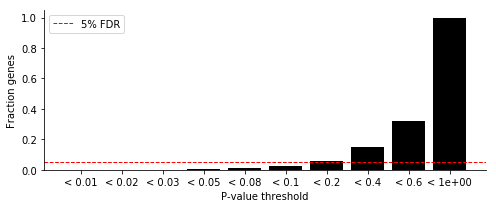

In [10]:
figsize(7, 3)

plt.bar(np.arange(10), pp / 3000, fc='k')
plt.xticks(np.arange(10), ['< {:0.1}'.format(i) for i in tt]);
plt.xlabel('P-value threshold')
plt.ylabel('Fraction genes');
plt.axhline(0.05, c='r', ls='--', lw=1, label='5% FDR')
plt.legend();

plt.tight_layout()
plt.savefig('null_model_simulation.pdf', bbox_inches='tight')

(0.0, 100)

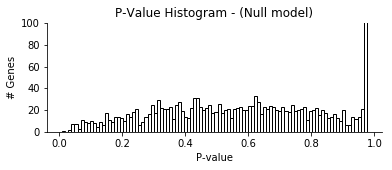

In [14]:
figsize(6, 2)
plt.hist(results.pval, bins=100, color='w', ec='k');
plt.title('P-Value Histogram - (Null model)')
plt.ylabel('# Genes')
plt.xlabel('P-value');
plt.ylim(ymax=100)

In [21]:
(results.pval > 0.94).value_counts()

False    1627
True     1373
Name: pval, dtype: int64